## Observations and Insights

## Dependencies and starter code

In [362]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_combo = mouse_metadata.merge(study_results)

print(f'length: {len(mouse_study_combo)}')
print(f'data types: {mouse_study_combo.dtypes}')

mouse_study_combo.head()


length: 1893
data types: Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [363]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = pd.DataFrame({
    '':['mean', 'median','variance', 'std', 'SEM'],
    'Age_months':[round(mouse_study_combo.loc[:,'Age_months'].mean(),2),
                 round(mouse_study_combo.loc[:,'Age_months'].median(),2),
                 round(mouse_study_combo.loc[:,'Age_months'].var(),2),
                 round(mouse_study_combo.loc[:,'Age_months'].std(),2),
                 round(mouse_study_combo.loc[:,'Age_months'].sem(),2)],
    
    'Weight (g)':[round(mouse_study_combo.loc[:,'Weight (g)'].mean(),2),
                 round(mouse_study_combo.loc[:,'Weight (g)'].median(),2),
                 round(mouse_study_combo.loc[:,'Weight (g)'].var(),2),
                 round(mouse_study_combo.loc[:,'Weight (g)'].std(),2),
                 round(mouse_study_combo.loc[:,'Weight (g)'].sem(),2)],
    
    'Timepoint':[round(mouse_study_combo.loc[:,'Timepoint'].mean(),2),
                 round(mouse_study_combo.loc[:,'Timepoint'].median(),2),
                 round(mouse_study_combo.loc[:,'Timepoint'].var(),2),
                 round(mouse_study_combo.loc[:,'Timepoint'].std(),2),
                 round(mouse_study_combo.loc[:,'Timepoint'].sem(),2)],
    
    'Tumor Volume (mm3)':[round(mouse_study_combo.loc[:,'Tumor Volume (mm3)'].mean(),2),
                 round(mouse_study_combo.loc[:,'Tumor Volume (mm3)'].median(),2),
                 round(mouse_study_combo.loc[:,'Tumor Volume (mm3)'].var(),2),
                 round(mouse_study_combo.loc[:,'Tumor Volume (mm3)'].std(),2),
                 round(mouse_study_combo.loc[:,'Tumor Volume (mm3)'].sem(),2)],
    
    'Metastatic Sites':[round(mouse_study_combo.loc[:,'Metastatic Sites'].mean(),2),
                 round(mouse_study_combo.loc[:,'Metastatic Sites'].median(),2),
                 round(mouse_study_combo.loc[:,'Metastatic Sites'].var(),2),
                 round(mouse_study_combo.loc[:,'Metastatic Sites'].std(),2),
                 round(mouse_study_combo.loc[:,'Metastatic Sites'].sem(),2)]
})


print("SUMMARY STATS")
summary_stats

SUMMARY STATS


,,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,mean,12.81,25.66,19.57,50.45,1.02
1,median,13.00,27.00,20.00,48.95,1.00
2,variance,51.69,15.38,198.23,79.12,1.29
3,std,7.19,3.92,14.08,8.89,1.14
4,SEM,0.17,0.09,0.32,0.20,0.03


## Bar plots

Text(0, 0.5, 'Treatment Count')

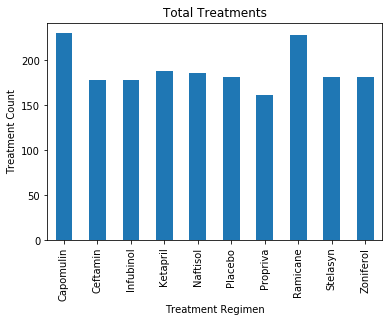

In [364]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

treatments_group = mouse_study_combo.groupby('Drug Regimen')

count_treatments = treatments_group['Drug Regimen'].count()

count_chart = count_treatments.plot(kind="bar")

plt.title('Total Treatments')
plt.xlabel('Treatment Regimen')
plt.ylabel('Treatment Count')

<BarContainer object of 10 artists>

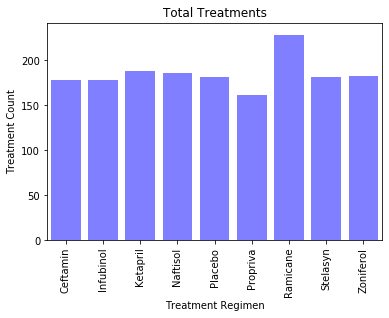

In [365]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#DataFrame.plot() and Matplotlib's pyplot 
x_axis = np.arange(len(count_treatments))
y_axis = count_treatments.values.tolist()

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, count_treatments.index.tolist(),rotation='vertical')

plt.title('Total Treatments')
plt.xlabel('Treatment Regimen')
plt.ylabel('Treatment Count')

plt.xlim(0.50,len(x_axis)- 0.5)

plt.bar(x_axis, y_axis, color="b", alpha = 0.5, align="center")

## Pie plots

In [366]:
sex = mouse_study_combo['Sex']
sex = pd.DataFrame(sex.value_counts())
sex

,Sex
Male,958
Female,935


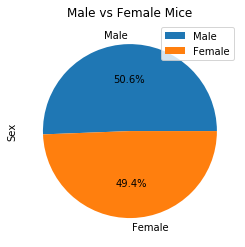

In [367]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex.plot.pie(subplots=True,autopct="%1.1f%%")

plt.title('Male vs Female Mice')
plt.show()

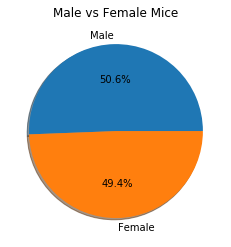

In [368]:
# Generate a pie plot showing the distribution of female versus 
#male mice using pyplot

labels = ['Male','Female']
sizes = [958,935]

plt.title('Male vs Female Mice')

plt.pie(sizes,labels=labels, shadow = True, autopct="%1.1f%%")
plt.show()

## Quartiles, outliers and boxplots

In [369]:
#FIGURE OUT THE TOP 4 MOST PROMISING TREATMENTS

#find start and stop values in DFs
start_tvols = mouse_study_combo.loc[(mouse_study_combo['Timepoint']== 0), :]
stop_tvols = mouse_study_combo.loc[(mouse_study_combo['Timepoint']== 45), :]

#merge DFs
startstop_merge = start_tvols.merge(stop_tvols, on='Mouse ID',suffixes=('_start','_stop'))

startstop_merge = startstop_merge.drop(columns=['Drug Regimen_stop','Sex_stop','Timepoint_start','Timepoint_stop'])

In [370]:
#determine the diff in tumor size from start to finish for each mouse, add to df
tumor_dif = startstop_merge['Tumor Volume (mm3)_stop'] - startstop_merge['Tumor Volume (mm3)_start']
startstop_merge['Tumor Diff'] = tumor_dif
#rename
startstop_merge = startstop_merge.rename(columns={'Drug Regimen_start':'Drug Regimen'})

In [371]:
#create the group based off the drug type
group = startstop_merge.groupby(['Drug Regimen'])
t_dif = group['Tumor Diff'].mean()

#convert to DF
promising_df = pd.DataFrame({"Tumor Diff":t_dif})

#sort
promising_df = promising_df.sort_values(by=['Tumor Diff'],ascending = False)

top_four = promising_df[:4]

top_four_list = top_four.index.values.tolist()

In [446]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.

top_four = stop_tvols.loc[(stop_tvols['Drug Regimen']== top_four_list[0])|
                             (stop_tvols['Drug Regimen']== top_four_list[1])|
                             (stop_tvols['Drug Regimen']== top_four_list[2])|
                             (stop_tvols['Drug Regimen']== top_four_list[3]),
                             :]
top_four = top_four.set_index('Drug Regimen')

#sort
top_four = top_four.sort_values(by=['Drug Regimen','Mouse ID'])
#remove duplicate columns
top_four = top_four.drop(columns=['Sex', 'Age_months', 'Weight (g)', 'Timepoint','Metastatic Sites'])
#group it
top_four_group = top_four.groupby(['Drug Regimen','Mouse ID'])
#convert to DF
top_four_df = pd.DataFrame(top_four_group.mean())
#rename
top_four_df = top_four_df.rename(columns={'Tumor Volume (mm3)':'Final Tumor Volume (mm3)'})

top_four_df

Final Tumor Volume (mm3)
Drug Regimen Mouse ID                          
Ketapril     c832                     65.415955
             g497                     69.872251
             h246                     74.104086
             k382                     73.715619
             m550                     69.253503
             m650                     73.901399
             o331                     78.567014
             p189                     75.294936
             u327                     66.268801
             w422                     67.989530
             y260                     62.909441
Naftisol     a818                     74.997764
             b559                     73.051363
             e213                     63.105696
             e584                     68.359777
             j755                     69.563621
             l700                     63.946640
             l725                     76.668817
             n304                     63.586395
             r604                     62.670759
             r701                     69.778544
             t724                     75.113288
             z795                     65.741070
             z969                     73.867845
Placebo      a262                     70.717621
             a897                     72.255963
             c282                     65.815165
             c757                     69.042841
             c766                     69.823146
             e227                     73.212939
             o795                     73.059454
             q787                     66.096475
             t718                     63.423695
             x773                     58.634971
             y478                     66.842635
Stelasyn     a492                     60.122011
             a963                     62.765093
             b879                     72.555239
             c402                     74.040390
             i901                     65.341811
             j984                     70.653832
             k862                     69.299149
             m269                     75.123690
             s565                     72.588964
             t451                     68.711630
             x402                     61.619606

In [494]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.

#ketapril outliers
ketapril = top_four.loc[top_four.index == 'Ketapril']
quartiles = ketapril.quantile([.25,.5,.75])

lowerq = round(quartiles.iloc[0,0],2)
upperq = round(quartiles.iloc[2,0],2)
iqr = round(upperq-lowerq,2)


print(f"The lower quartile of ketapril is: {lowerq}")
print(f"The upper quartile of ketapril is: {upperq}")
print(f"The interquartile range of ketapril is: {iqr}")

ketapril_outliers_df = ketapril.loc[(ketapril['Tumor Volume (mm3)']< lowerq) | 
                                    (ketapril['Tumor Volume (mm3)']> upperq)]

print(f'there are: {len(ketapril_outliers_df)} outliers')
print(f'{round(len(ketapril_outliers_df)/len(ketapril)*100,2)}% are outliers')
ketapril_outliers_df.round({'Tumor Volume (mm3)':2})

The lower quartile of ketapril is: 67.13
The upper quartile of ketapril is: 74.0
The interquartile range of ketapril is: 6.87
there are: 6 outliers
54.55% are outliers


,Mouse ID,Tumor Volume (mm3)
Drug Regimen,,
Ketapril,c832,65.42
Ketapril,h246,74.10
Ketapril,o331,78.57
Ketapril,p189,75.29
Ketapril,u327,66.27
Ketapril,y260,62.91


In [495]:
#naftisol outliers
naftisol = top_four.loc[top_four.index == 'Naftisol']
quartiles = naftisol.quantile([.25,.5,.75])

lowerq = round(quartiles.iloc[0,0],2)
upperq = round(quartiles.iloc[2,0],2)
iqr = round(upperq-lowerq,2)


print(f"The lower quartile of naftisol is: {lowerq}")
print(f"The upper quartile of naftisol is: {upperq}")
print(f"The interquartile range of naftisol is: {iqr}")

naftisol_outliers_df = naftisol.loc[(naftisol['Tumor Volume (mm3)']< lowerq) | 
                                    (naftisol['Tumor Volume (mm3)']> upperq)]

print(f'there are: {len(naftisol_outliers_df)} outliers')
print(f'{round(len(naftisol_outliers_df)/len(naftisol)*100,2)}% are outliers')
naftisol_outliers_df.round({'Tumor Volume (mm3)':2})

The lower quartile of naftisol is: 63.95
The upper quartile of naftisol is: 73.87
The interquartile range of naftisol is: 9.92
there are: 7 outliers
53.85% are outliers


,Mouse ID,Tumor Volume (mm3)
Drug Regimen,,
Naftisol,a818,75.00
Naftisol,e213,63.11
Naftisol,l700,63.95
Naftisol,l725,76.67
Naftisol,n304,63.59
Naftisol,r604,62.67
Naftisol,t724,75.11


In [496]:
#placebo outliers
placebo = top_four.loc[top_four.index == 'Placebo']
quartiles = placebo.quantile([.25,.5,.75])

lowerq = round(quartiles.iloc[0,0],2)
upperq = round(quartiles.iloc[2,0],2)
iqr = round(upperq-lowerq,2)


print(f"The lower quartile of placebo is: {lowerq}")
print(f"The upper quartile of placebo is: {upperq}")
print(f"The interquartile range of placebo is: {iqr}")

placebo_outliers_df = placebo.loc[(placebo['Tumor Volume (mm3)']< lowerq) | 
                                    (placebo['Tumor Volume (mm3)']> upperq)]

print(f'there are: {len(placebo_outliers_df)} outliers')
print(f'{round(len(placebo_outliers_df)/len(placebo)*100,2)}% are outliers')
placebo_outliers_df.round({'Tumor Volume (mm3)':2})

The lower quartile of placebo is: 65.96
The upper quartile of placebo is: 71.49
The interquartile range of placebo is: 5.53
there are: 6 outliers
54.55% are outliers


,Mouse ID,Tumor Volume (mm3)
Drug Regimen,,
Placebo,a897,72.26
Placebo,c282,65.82
Placebo,e227,73.21
Placebo,o795,73.06
Placebo,t718,63.42
Placebo,x773,58.63


In [497]:
#stelasyn outliers
stelasyn = top_four.loc[top_four.index == 'Stelasyn']
quartiles = stelasyn.quantile([.25,.5,.75])

lowerq = round(quartiles.iloc[0,0],2)
upperq = round(quartiles.iloc[2,0],2)
iqr = round(upperq-lowerq,2)


print(f"The lower quartile of stelasyn is: {lowerq}")
print(f"The upper quartile of stelasyn is: {upperq}")
print(f"The interquartile range of stelasyn is: {iqr}")

stelasyn_outliers_df = stelasyn.loc[(stelasyn['Tumor Volume (mm3)']< lowerq) | 
                                    (stelasyn['Tumor Volume (mm3)']> upperq)]

print(f'there are: {len(stelasyn_outliers_df)} outliers')
print(f'{round(len(stelasyn_outliers_df)/len(stelasyn)*100,2)}% are outliers')
stelasyn_outliers_df.round({'Tumor Volume (mm3)':2})

The lower quartile of stelasyn is: 64.05
The upper quartile of stelasyn is: 72.57
The interquartile range of stelasyn is: 8.52
there are: 6 outliers
54.55% are outliers


,Mouse ID,Tumor Volume (mm3)
Drug Regimen,,
Stelasyn,a492,60.12
Stelasyn,a963,62.77
Stelasyn,c402,74.04
Stelasyn,m269,75.12
Stelasyn,s565,72.59
Stelasyn,x402,61.62


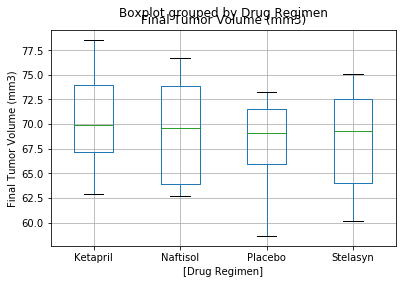

In [498]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
top_four_df.boxplot(by='Drug Regimen')

plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and scatter plots

In [499]:
#Create a DataFrame of only Capomulin
capomulin_df = mouse_study_combo.loc[mouse_study_combo['Drug Regimen']== 'Capomulin']
s185_df = capomulin_df.loc[capomulin_df['Mouse ID']== "s185"]
#s185_df

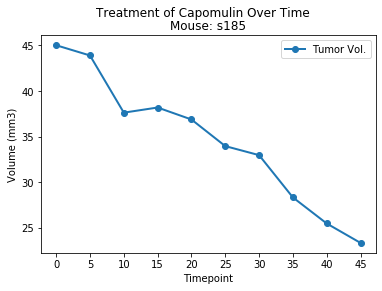

In [505]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#data to plot
x_axis = np.arange(0,10,1)
t_vol = s185_df['Tumor Volume (mm3)'].values.tolist()
timepoint = s185_df['Timepoint'].values.tolist()

#relabel the tix
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoint)

#plot the graph
plt.plot(x_axis, t_vol,marker="o",linewidth=2, label = "Tumor Vol.")

#Format
plt.legend(loc='best')
plt.suptitle('Treatment of Capomulin Over Time')
plt.title('Mouse: s185')
plt.xlabel('Timepoint')
plt.ylabel('Volume (mm3)')

plt.show()


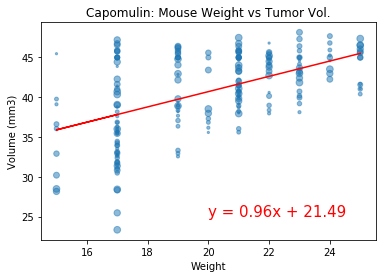

In [501]:
x_values = capomulin_df ['Weight (g)']
y_values = capomulin_df ['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,alpha = 0.5, s = timepoint)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")

plt.title('Capomulin: Mouse Weight vs Tumor Vol.')
plt.xlabel('Weight')
plt.ylabel('Volume (mm3)')

plt.show()